In [17]:
import pandas as pd
from src.online_learning.change_detection.cluster_estimation import cluster_estimation
from src.online_learning.cluster import Cluster
from notebooks.online_learning.utils.plotting_utils import threed_scatter
import numpy as np
import matplotlib.pyplot as plt

## nominal clusters dataframe

In [18]:
df_phi_0 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_0_kmeans.csv')
df_phi_1 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_1_kmeans.csv')
df_phi_2 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_2_kmeans.csv')
df_phi_3 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_3_kmeans.csv')

In [19]:
df_phi_3.describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,13.333333,47.777778,8088.639648,0.018434,0.024309,3.0
std,4.952606,31.722063,2850.623631,0.004103,0.010207,0.0
min,10.000000,0.000000,976.466778,0.013612,0.013954,3.0
25%,10.000000,20.000000,6809.928951,0.015858,0.018272,3.0
50%,10.000000,50.000000,7717.072911,0.017717,0.021690,3.0
75%,15.000000,70.000000,9348.786525,0.019670,0.026635,3.0
max,25.000000,100.000000,15552.536417,0.034656,0.070274,3.0


In [20]:
df_phi_2.describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,4.00,4.0,4.000000,4.000000,4.000000,4.0
mean,11.25,12.5,624.361218,0.028771,0.137798,2.0
std,2.50,25.0,1011.967976,0.009828,0.021040,0.0
min,10.00,0.0,103.544660,0.022908,0.108859,2.0
25%,10.00,0.0,105.365797,0.023435,0.128893,2.0
50%,10.00,0.0,125.933231,0.024364,0.144406,2.0
75%,11.25,12.5,644.928652,0.029700,0.153311,2.0
max,15.00,50.0,2142.033750,0.043449,0.153520,2.0


In [21]:
nominal_cluster_3 = df_phi_3.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_3_list = [nominal_cluster_3[i, :] for i in range(nominal_cluster_3.shape[0])]
nominal_cluster_2 = df_phi_2.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_2_list = [nominal_cluster_2[i, :] for i in range(nominal_cluster_2.shape[0])]
nominal_cluster_1 = df_phi_1.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_1_list = [nominal_cluster_1[i, :] for i in range(nominal_cluster_1.shape[0])]
nominal_cluster_0 = df_phi_0.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_0_list = [nominal_cluster_0[i, :] for i in range(nominal_cluster_0.shape[0])]

## faulty ground dataframe

In [22]:
df_stuck_fault_on_voltage = pd.read_csv('../../../data/ground/fault_signals/stuck_fault_voltage_ground.csv')

<Axes: >

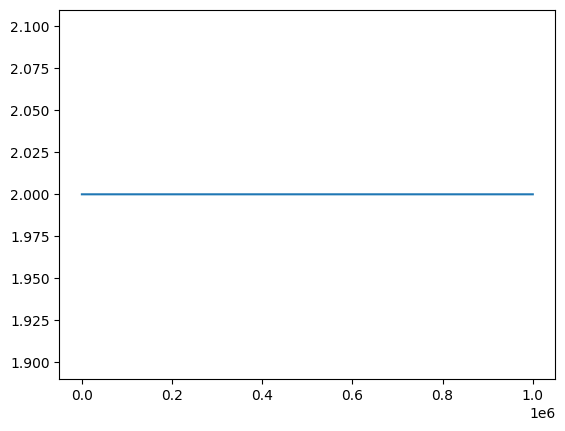

In [23]:
df_stuck_fault_on_voltage['voltage'].plot()

In [24]:
df_stuck_fault_on_voltage.describe()

,time,current,voltage,temperature
count,1.000000e+06,1000000.000000,1000000.0,1000000.000000
mean,5.097484e+05,0.106791,2.0,313.382627
std,2.943037e+05,19.334477,0.0,4.861828
min,0.000000e+00,-23.953000,2.0,299.328949
25%,2.548748e+05,-21.656000,2.0,309.874074
50%,5.097485e+05,1.041000,2.0,312.187236
75%,7.646222e+05,16.209000,2.0,314.665012
max,1.019497e+06,32.551000,2.0,326.815423


<Axes: >

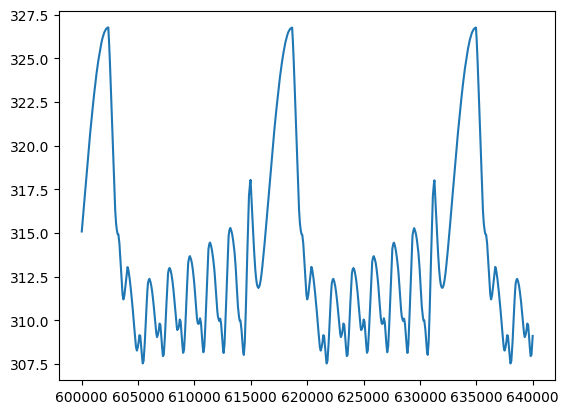

In [51]:
df_stuck_fault_on_voltage['temperature'].iloc[600000:640000].plot()

## abrupt experiment dataframe

In [25]:
df_v_optimizer = pd.read_csv('../../../data/output/abrupt/12_09_2024/v_optimizer.csv')
df_history_theta = pd.read_csv('../../../data/output/abrupt/12_09_2024/history_theta.csv')
df_outliers_theta = pd.read_csv('../../../data/output/abrupt/12_09_2024/outliers_set.csv')

In [26]:
df_v_optimizer.describe()

,v_optimizer
count,9.600000e+05
mean,NaN
std,NaN
min,-inf
25%,2.472932e+01
50%,2.680539e+01
75%,2.848097e+01
max,inf


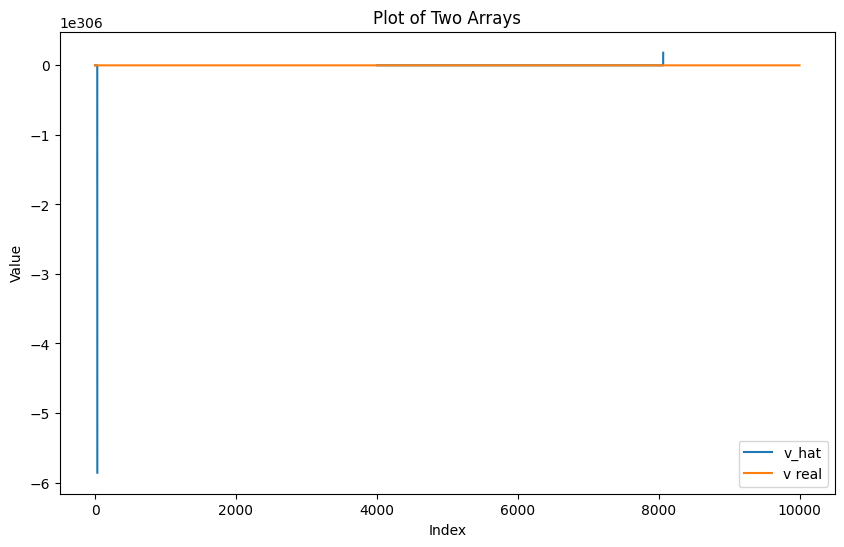

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(df_v_optimizer.iloc[800000:900000:10].values, label='v_hat')
plt.plot(df_stuck_fault_on_voltage['voltage'].iloc[800000:900000:10].values, label='v real')
plt.title('Plot of Two Arrays')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()

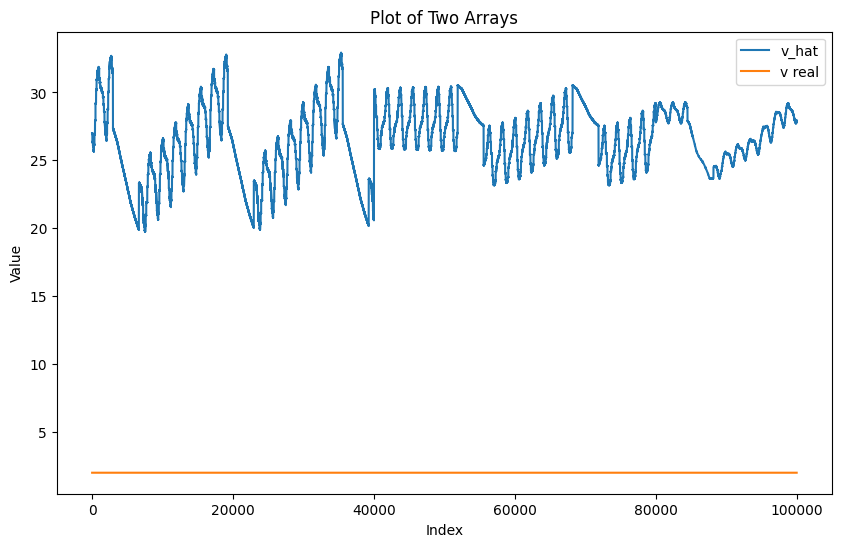

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(df_v_optimizer.iloc[400000:500000].values, label='v_hat')
plt.plot(df_stuck_fault_on_voltage['voltage'].iloc[400000:500000].values, label='v real')
plt.title('Plot of Two Arrays')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()

In [78]:
difference = [a - b for a, b in zip(df_v_optimizer.values,df_stuck_fault_on_voltage['voltage'].values )]

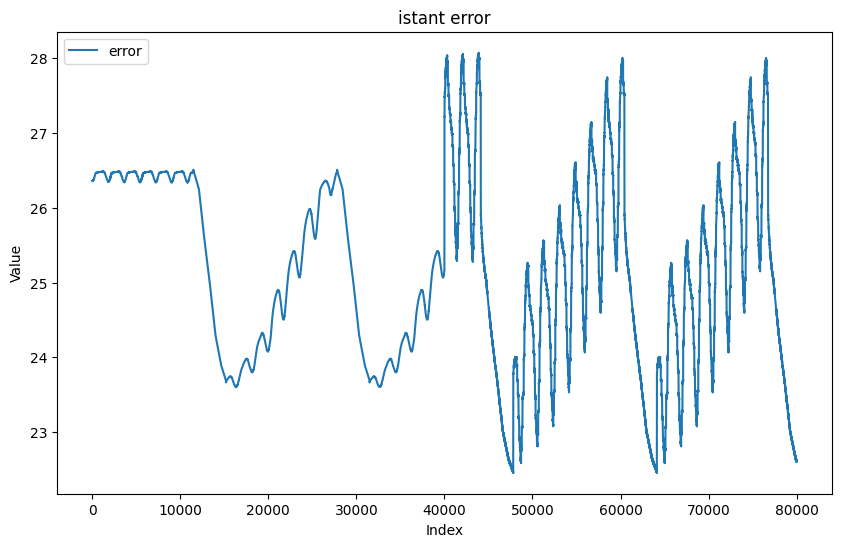

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(difference[0:80000], label='error')
plt.title('istant error')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()

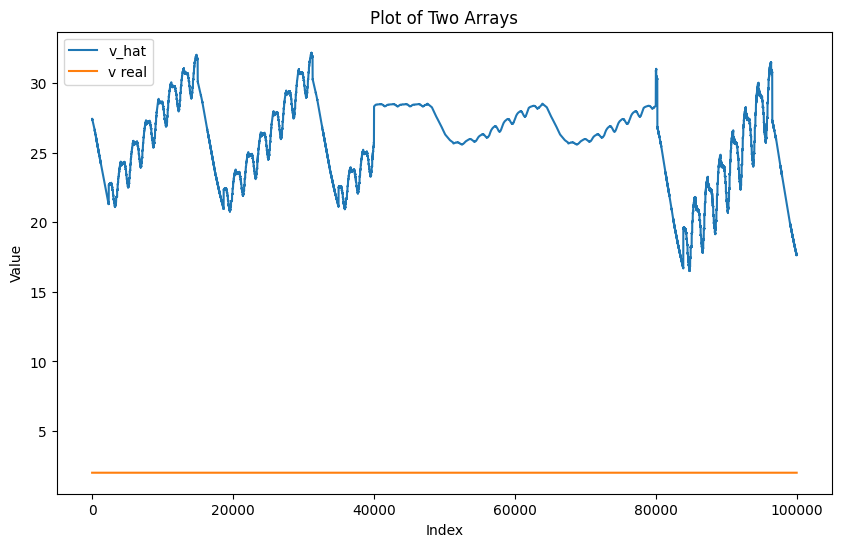

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(df_v_optimizer.iloc[600000:700000].values, label='v_hat')
plt.plot(df_stuck_fault_on_voltage['voltage'].iloc[600000:700000].values, label='v real')
plt.title('Plot of Two Arrays')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()

In [28]:
outliers_set = df_outliers_theta.values
outliers_list = [outliers_set[i, :] for i in range(outliers_set.shape[0])]

## Estimate the cluster 

In [29]:
phi = cluster_estimation(cluster_data_points=nominal_cluster_3_list,outliers=outliers_list)

Len of first PC for cluster datapoints: 54
type of datapoints: <class 'numpy.ndarray'>
shape of datapoints: (54, 1)
Len of first PC for outliers: 24
type of outliers: <class 'numpy.ndarray'>
shape of outliers: (24, 1)
Reject the null hypothesis: Create a new cluster.
len of list of o_tildes 11


In [30]:
print(phi)

[<src.online_learning.cluster.Cluster object at 0x7f12a5cee6a0>, None, None, None, None, None, None, None, None, None, None]


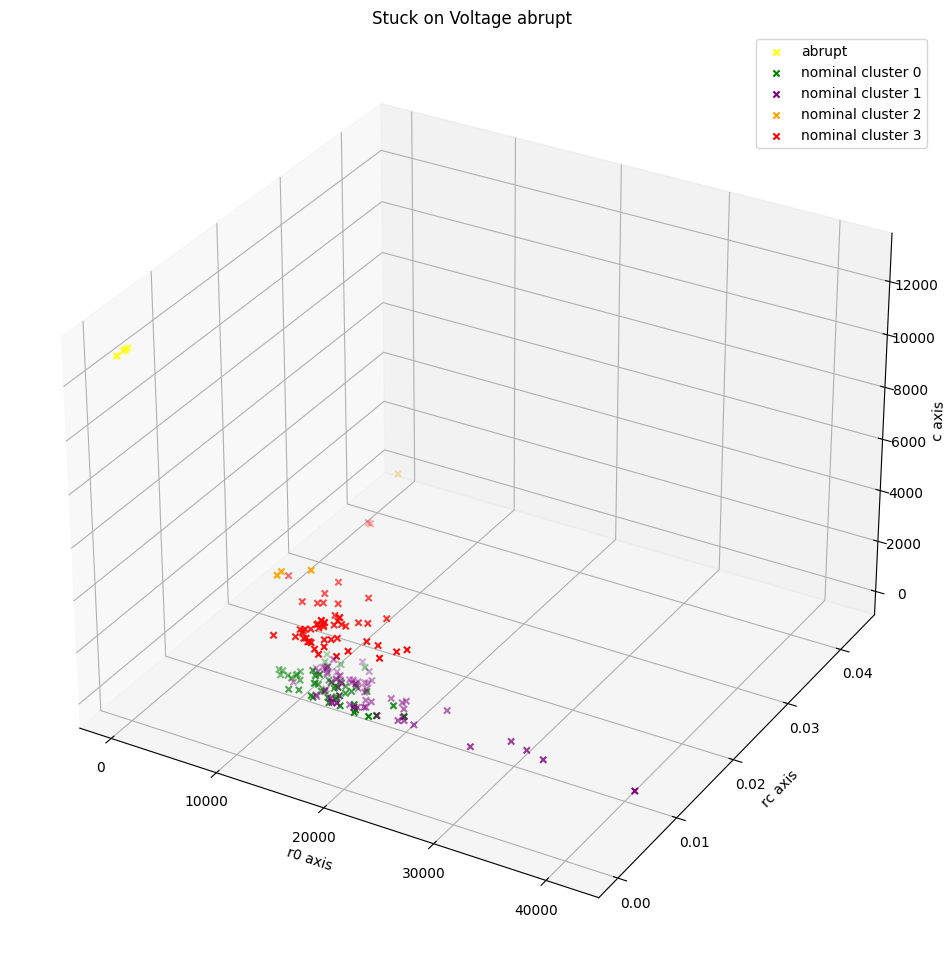

In [31]:
nom0 = np.array(nominal_cluster_0_list)
nom1 = np.array(nominal_cluster_1_list)
nom2 = np.array(nominal_cluster_2_list)
nom3 = np.array(nominal_cluster_3_list)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(phi[0].data_points[:, 0], phi[0].data_points[:, 1], phi[0].data_points[:, 2], c='yellow', marker='x', label='abrupt')
ax.scatter(nom0[:, 0], nom0[:, 1], nom0[:, 2], c='green', marker='x', label='nominal cluster 0')
ax.scatter(nom1[:, 0], nom1[:, 1], nom1[:, 2], c='purple', marker='x', label='nominal cluster 1')
ax.scatter(nom2[:, 0], nom2[:, 1], nom2[:, 2], c='orange', marker='x', label='nominal cluster 2')
ax.scatter(nom3[:, 0], nom3[:, 1], nom3[:, 2], c='r', marker='x', label='nominal cluster 3')

ax.set_xlabel('r0 axis')
ax.set_ylabel('rc axis')
ax.set_zlabel('c axis')
ax.set_title('Stuck on Voltage abrupt')

ax.legend()
#ax.view_init(elev=13, azim=10)
# Show the plot
plt.show()

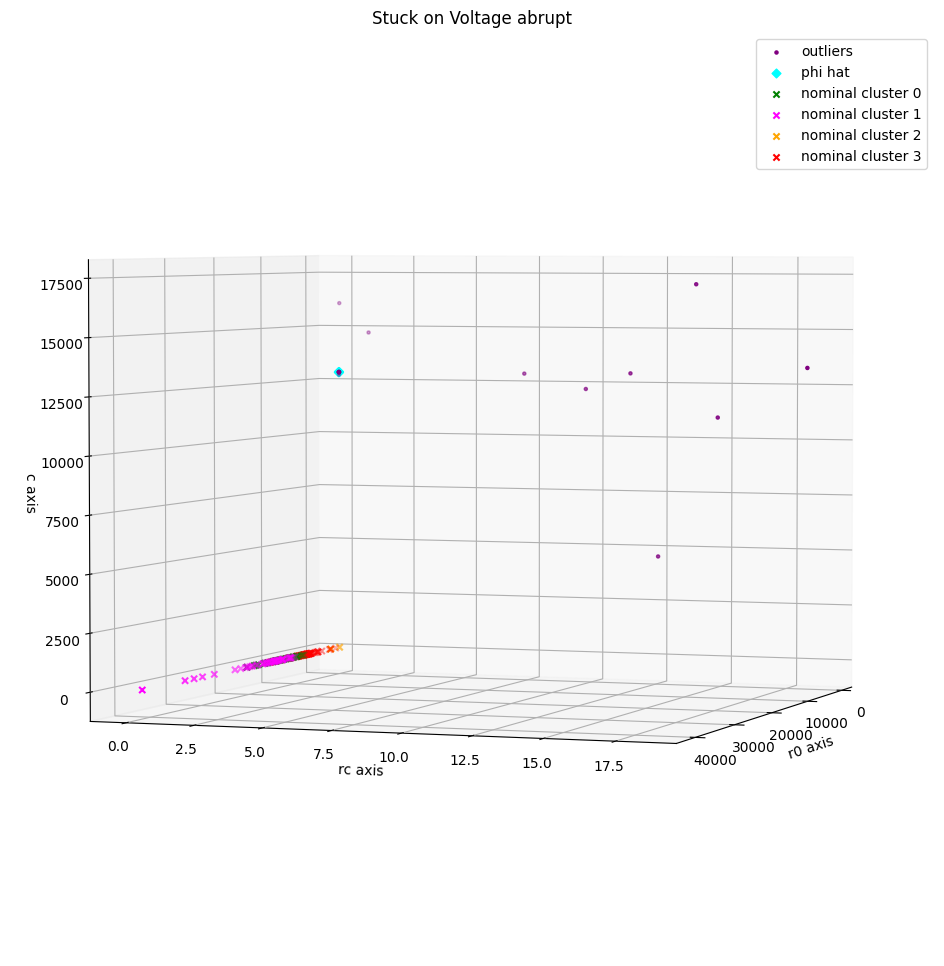

In [32]:
out = np.array(outliers_list)
nom0 = np.array(nominal_cluster_0_list)
nom1 = np.array(nominal_cluster_1_list)
nom2 = np.array(nominal_cluster_2_list)
nom3 = np.array(nominal_cluster_3_list)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(out[:, 0], out[:, 1], out[:, 2], c='purple', marker='.', label='outliers')
ax.scatter(phi[0].data_points[:, 0], phi[0].data_points[:, 1], phi[0].data_points[:, 2], c='cyan', marker='D', label='phi hat')
ax.scatter(nom0[:, 0], nom0[:, 1], nom0[:, 2], c='green', marker='x', label='nominal cluster 0')
ax.scatter(nom1[:, 0], nom1[:, 1], nom1[:, 2], c='magenta', marker='x', label='nominal cluster 1')
ax.scatter(nom2[:, 0], nom2[:, 1], nom2[:, 2], c='orange', marker='x', label='nominal cluster 2')
ax.scatter(nom3[:, 0], nom3[:, 1], nom3[:, 2], c='r', marker='x', label='nominal cluster 3')

ax.set_xlabel('r0 axis')
ax.set_ylabel('rc axis')
ax.set_zlabel('c axis')
ax.set_title('Stuck on Voltage abrupt')
ax.legend()
ax.view_init(elev=3, azim=20)

plt.show()